In [23]:
# Data Processing and Analysis Script for Eye Tracking Data

import glob
import pandas as pd
import re
import os
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [24]:
# Define AOIs
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]

In [26]:
#Creating a combined structured dataset by fetching files named gaze_data.csv, gaze_data (1).csv, gaze_data_2.csv, etc.

files = sorted(glob.glob("data/gaze_data_*.csv"))
if not files:
    raise FileNotFoundError("No files matching 'gaze_data*.csv' found.")

def user_id_from_name(name, fallback):
    m = re.search(r"\((\d+)\)", name)  # grabs the (3) in "gaze_data (3).csv"
    return int(m.group(1)) if m else fallback

frames = []
for i, path in enumerate(files, start=1):
    df = pd.read_csv(path)
    df["user"] = user_id_from_name(path, i)
    frames.append(df)

combined = pd.concat(frames, ignore_index=True, sort=False)
combined.to_csv("gaze_data_all_users_long.csv", index=False)
print(f"Combined {len(files)} files -> gaze_data_all_users_long.csv")


Combined 8 files -> gaze_data_all_users_long.csv


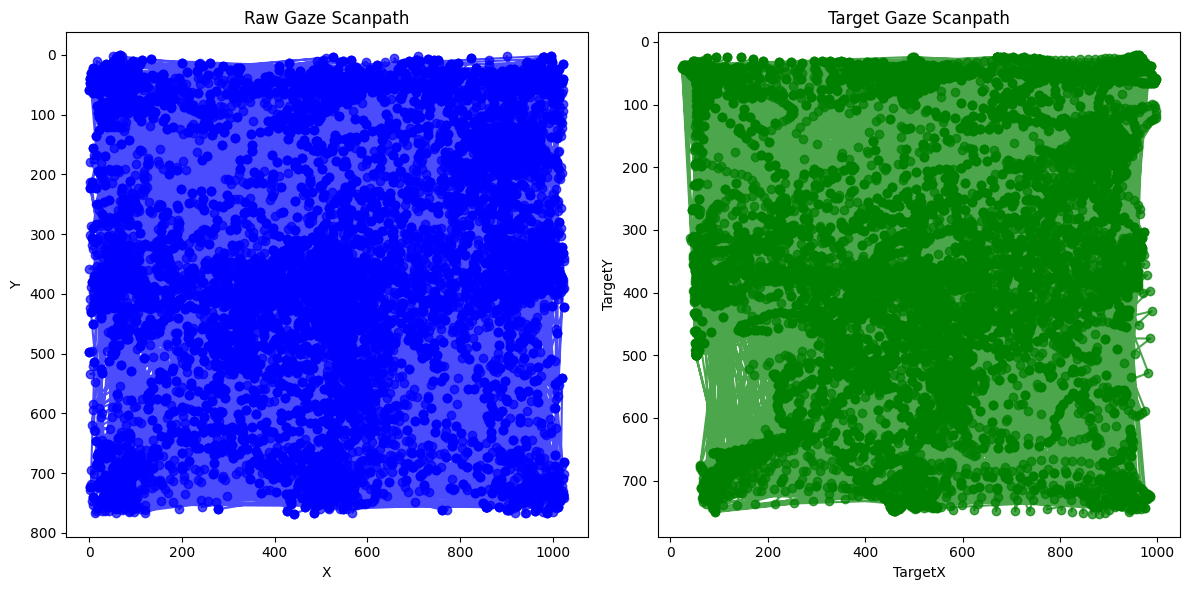

KeyboardInterrupt: 

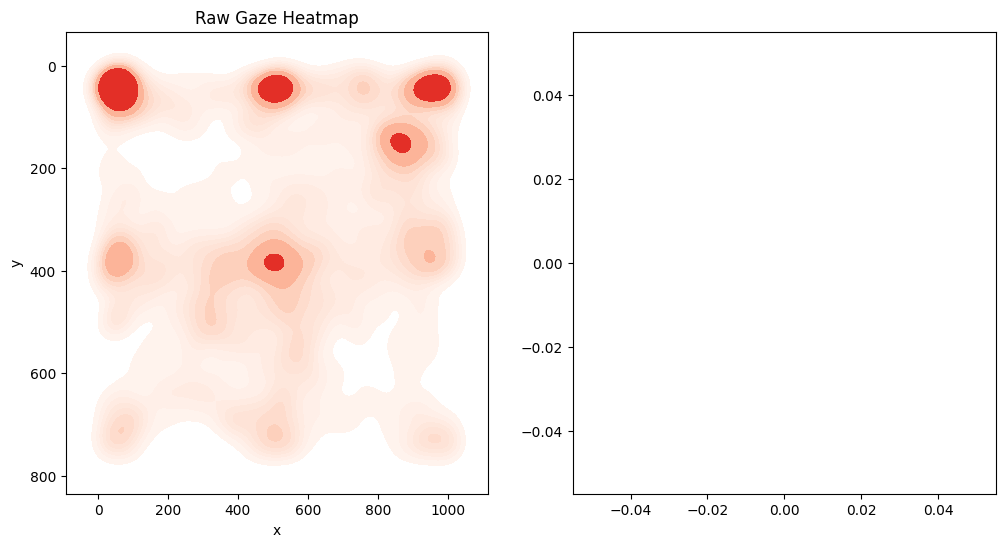

In [ ]:
#EXPLORATORY VISUALIZATION


# Load dataset 

df = combined[]


#Sort by timestamp
df = df.sort_values(by='timestamp')

#Plot raw and target scanpaths
def plot_scanpath(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze scanpath
    plt.subplot(1, 2, 1)
    plt.plot(df['x'], df['y'], marker='o', linestyle='-', color='blue', alpha=0.7)
    plt.title("Raw Gaze Scanpath")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().invert_yaxis()  # Invert y-axis if data is screen-based

    # Target gaze scanpath
    plt.subplot(1, 2, 2)
    plt.plot(df['targetX'], df['targetY'], marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Target Gaze Scanpath")
    plt.xlabel("TargetX")
    plt.ylabel("TargetY")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot heatmaps of gaze points
def plot_heatmaps(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze heatmap
    plt.subplot(1, 2, 1)
    sns.kdeplot(x=df['x'], y=df['y'], cmap='Reds', fill=True, bw_adjust=0.5)
    plt.title("Raw Gaze Heatmap")
    plt.gca().invert_yaxis()

    # Target gaze heatmap
    plt.subplot(1, 2, 2)
    sns.kdeplot(x=df['targetX'], y=df['targetY'], cmap='Greens', fill=True, bw_adjust=0.5)
    plt.title("Target Gaze Heatmap")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Execute plotting functions
plot_scanpath(df)
plot_heatmaps(df)


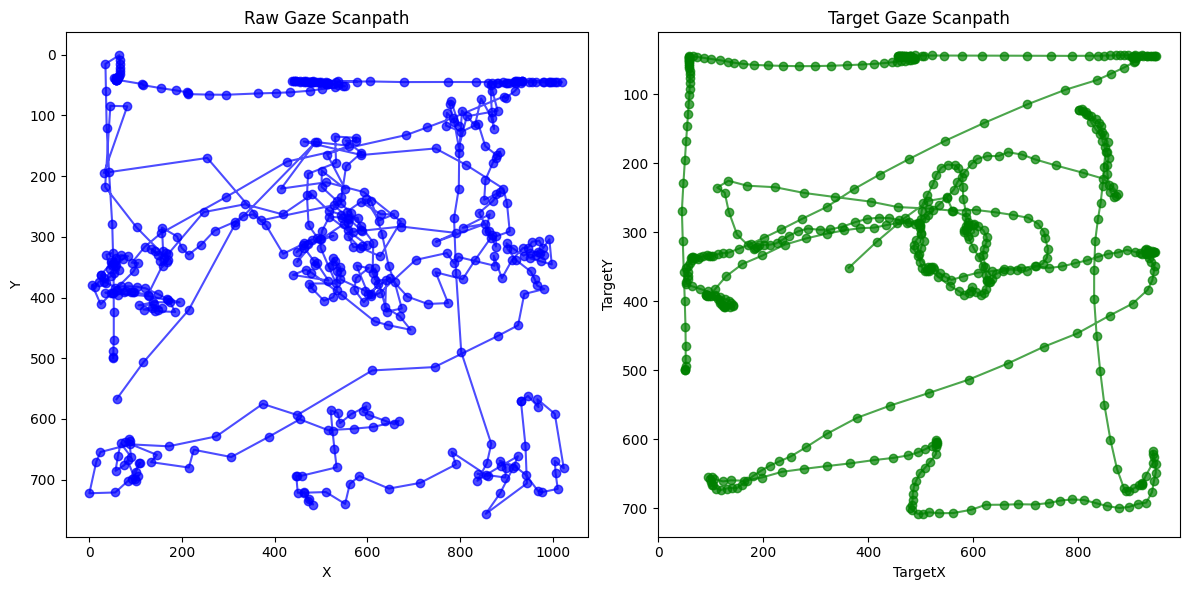

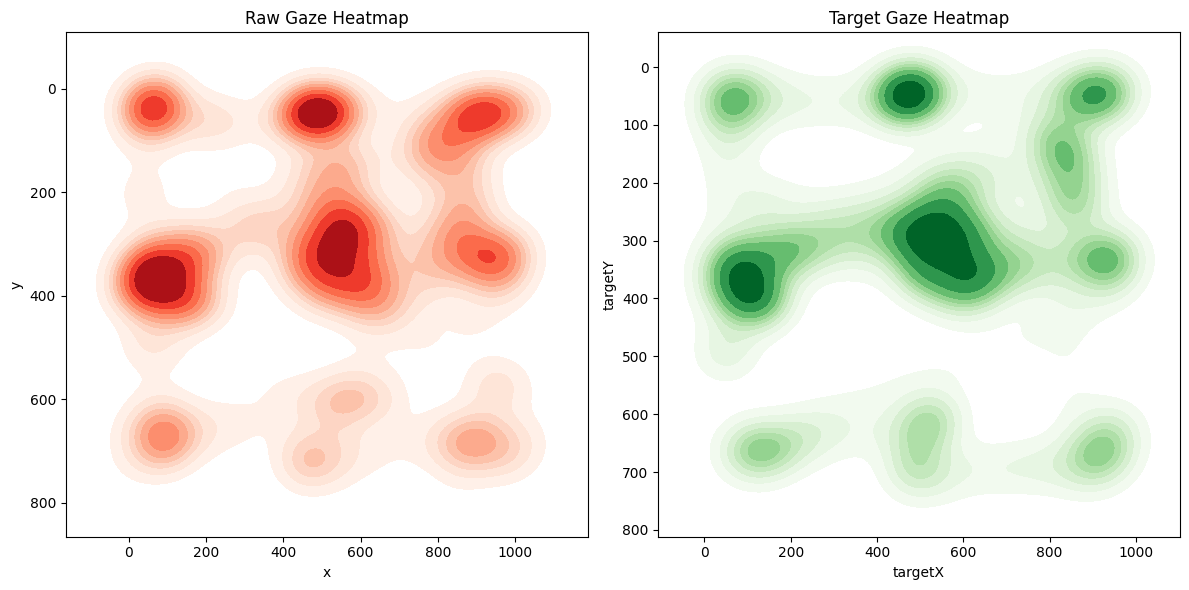

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update the path to your actual CSV file)
df = pd.read_csv(r'C:\Users\nisae\code\MPI\HCI\FINAL\gaze_data (7).csv')

# Step 1: Sort by timestamp
df = df.sort_values(by='timestamp')

# Step 2: Plot raw and target scanpaths
def plot_scanpath(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze scanpath
    plt.subplot(1, 2, 1)
    plt.plot(df['x'], df['y'], marker='o', linestyle='-', color='blue', alpha=0.7)
    plt.title("Raw Gaze Scanpath")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().invert_yaxis()  # Invert y-axis if data is screen-based

    # Target gaze scanpath
    plt.subplot(1, 2, 2)
    plt.plot(df['targetX'], df['targetY'], marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Target Gaze Scanpath")
    plt.xlabel("TargetX")
    plt.ylabel("TargetY")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Step 3: Plot heatmaps of gaze points
def plot_heatmaps(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze heatmap
    plt.subplot(1, 2, 1)
    sns.kdeplot(x=df['x'], y=df['y'], cmap='Reds', fill=True, bw_adjust=0.5)
    plt.title("Raw Gaze Heatmap")
    plt.gca().invert_yaxis()

    # Target gaze heatmap
    plt.subplot(1, 2, 2)
    sns.kdeplot(x=df['targetX'], y=df['targetY'], cmap='Greens', fill=True, bw_adjust=0.5)
    plt.title("Target Gaze Heatmap")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Execute plotting functions
plot_scanpath(df)
plot_heatmaps(df)


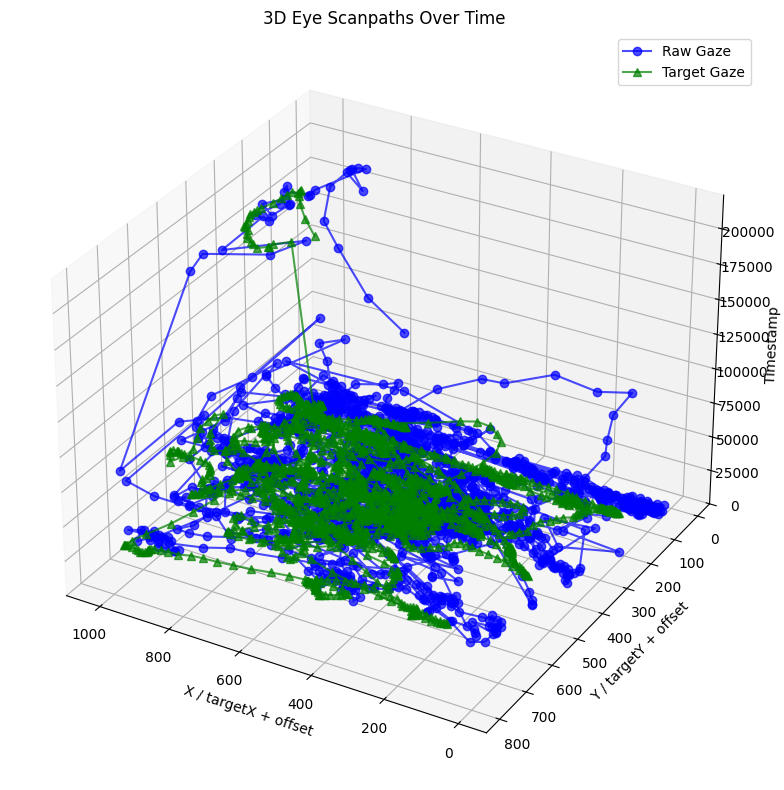

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and sort the data
df = pd.read_csv(r'C:\Users\nisae\code\MPI\HCI\FINAL\gaze_data (4).csv')
df = df.sort_values(by='timestamp')

# Optional: offset target gaze to separate layers
offset = 50  # Adjust to visually separate scanpaths

# 3D Scanpath Plotting Function
def plot_3d_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Raw gaze path
    ax.plot(df['x'], df['y'], df['timestamp'], color='blue', label='Raw Gaze', marker='o', alpha=0.7)

    # Target gaze path with offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'], 
            color='green', label='Target Gaze', marker='^', alpha=0.7)

    ax.set_xlabel("X / targetX + offset")
    ax.set_ylabel("Y / targetY + offset")
    ax.set_zlabel("Timestamp")
    ax.set_title("3D Eye Scanpaths Over Time")

    ax.view_init(elev=30, azim=120)  # Adjust angle for clarity
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_3d_scanpaths(df)


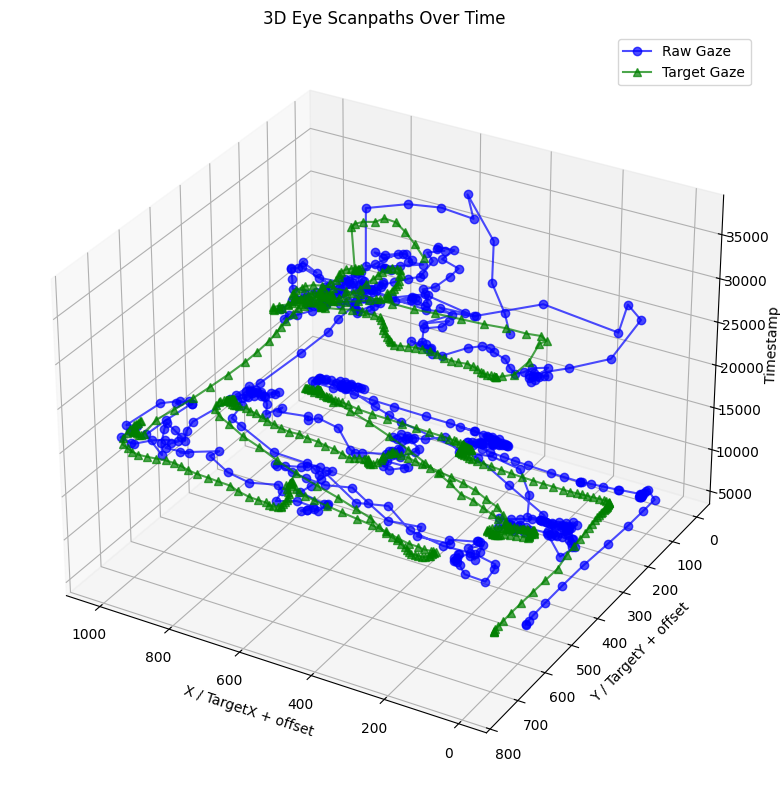

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and sort the data
df = df.sort_values(by='timestamp')

# Optional: offset target gaze to separate layers
offset = 50  # Adjust to visually separate scanpaths

# 3D Scanpath Plotting Function
def plot_3d_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Raw gaze path
    ax.plot(df['x'], df['y'], df['timestamp'], color='blue', label='Raw Gaze', marker='o', alpha=0.7)

    # Target gaze path with offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'], 
            color='green', label='Target Gaze', marker='^', alpha=0.7)

    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp")
    ax.set_title("3D Eye Scanpaths Over Time")

    ax.view_init(elev=30, azim=120)  # Adjust angle for clarity
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_3d_scanpaths(df)


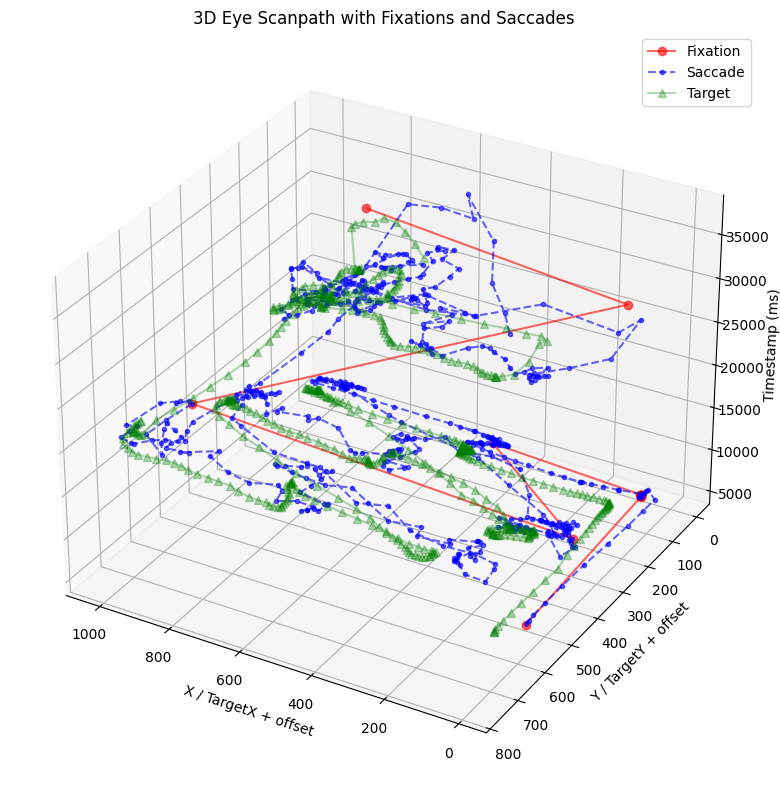

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and sort data
df = df.sort_values(by='timestamp').reset_index(drop=True)

# --- Step 1: Compute Velocity ---
# Euclidean distance between consecutive points
dx = df['x'].diff()
dy = df['y'].diff()
dt = df['timestamp'].diff() / 1000.0  # Convert ms to seconds

# Avoid division by zero
dt[dt == 0] = 1e-5

velocity = np.sqrt(dx**2 + dy**2) / dt
df['velocity'] = velocity.fillna(0)

# --- Step 2: Label Movement Type ---
VELOCITY_THRESHOLD = 30  # pixels/second (adjust based on sampling rate & screen size)

df['movement_type'] = np.where(df['velocity'] < VELOCITY_THRESHOLD, 'fixation', 'saccade')

# --- Step 3: 3D Plot with Movement Type Coloring ---
def plot_3d_clustered_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Fixations: slow movements (e.g., red)
    fixations = df[df['movement_type'] == 'fixation']
    ax.plot(fixations['x'], fixations['y'], fixations['timestamp'],
            color='red', marker='o', linestyle='-', label='Fixation', alpha=0.6)

    # Saccades: fast movements (e.g., blue)
    saccades = df[df['movement_type'] == 'saccade']
    ax.plot(saccades['x'], saccades['y'], saccades['timestamp'],
            color='blue', marker='.', linestyle='--', label='Saccade', alpha=0.6)

    # Optional: Target scanpath offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'],
            color='green', linestyle='-', marker='^', alpha=0.3, label='Target')

    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp (ms)")
    ax.set_title("3D Eye Scanpath with Fixations and Saccades")
    ax.legend()
    ax.view_init(elev=30, azim=120)
    plt.tight_layout()
    plt.show()

plot_3d_clustered_scanpaths(df)


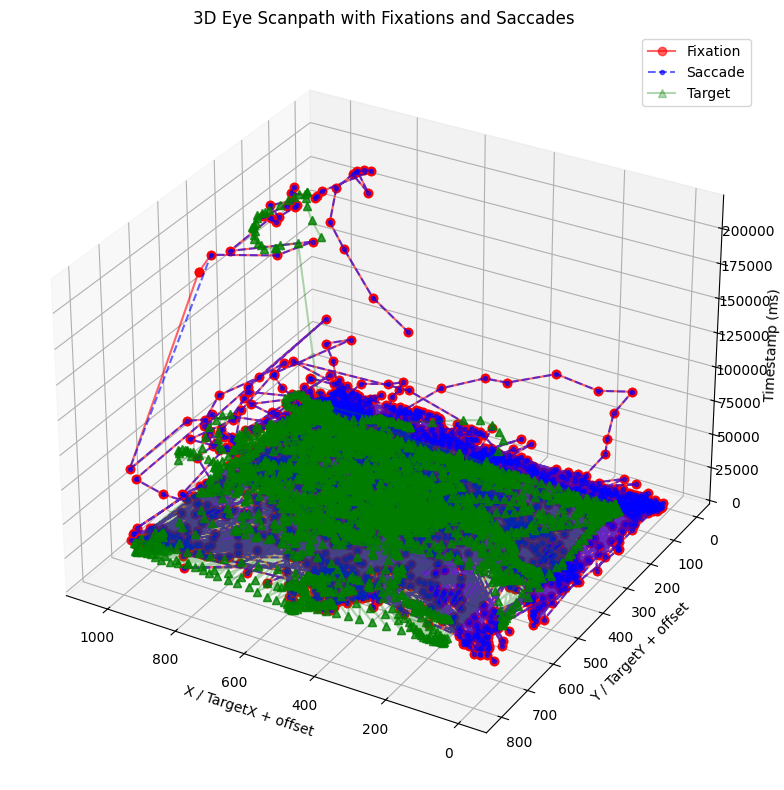

In [5]:

# Load and sort data
df = combined.sort_values(by='timestamp').reset_index(drop=True)

# --- Step 1: Compute Velocity ---
# Euclidean distance between consecutive points
dx = df['x'].diff()
dy = df['y'].diff()
dt = df['timestamp'].diff() / 1000.0  # Convert ms to seconds

# Avoid division by zero
dt[dt == 0] = 1e-5

velocity = np.sqrt(dx**2 + dy**2) / dt
df['velocity'] = velocity.fillna(0)

# --- Step 2: Label Movement Type ---
VELOCITY_THRESHOLD = 30  # pixels/second (adjust based on sampling rate & screen size)

df['movement_type'] = np.where(df['velocity'] < VELOCITY_THRESHOLD, 'fixation', 'saccade')

# --- Step 3: 3D Plot with Movement Type Coloring ---
def plot_3d_clustered_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Fixations: slow movements (e.g., red)
    fixations = df[df['movement_type'] == 'fixation']
    ax.plot(fixations['x'], fixations['y'], fixations['timestamp'],
            color='red', marker='o', linestyle='-', label='Fixation', alpha=0.6)

    # Saccades: fast movements (e.g., blue)
    saccades = df[df['movement_type'] == 'saccade']
    ax.plot(saccades['x'], saccades['y'], saccades['timestamp'],
            color='blue', marker='.', linestyle='--', label='Saccade', alpha=0.6)

    # Optional: Target scanpath offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'],
            color='green', linestyle='-', marker='^', alpha=0.3, label='Target')

    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp (ms)")
    ax.set_title("3D Eye Scanpath with Fixations and Saccades")
    ax.legend()
    ax.view_init(elev=30, azim=120)
    plt.tight_layout()
    plt.show()

plot_3d_clustered_scanpaths(df)


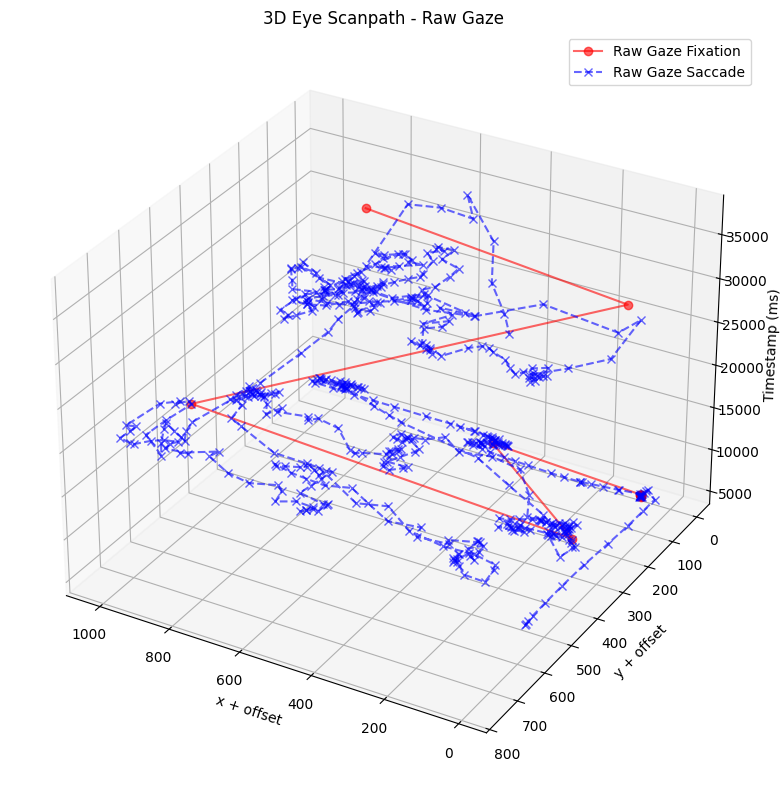

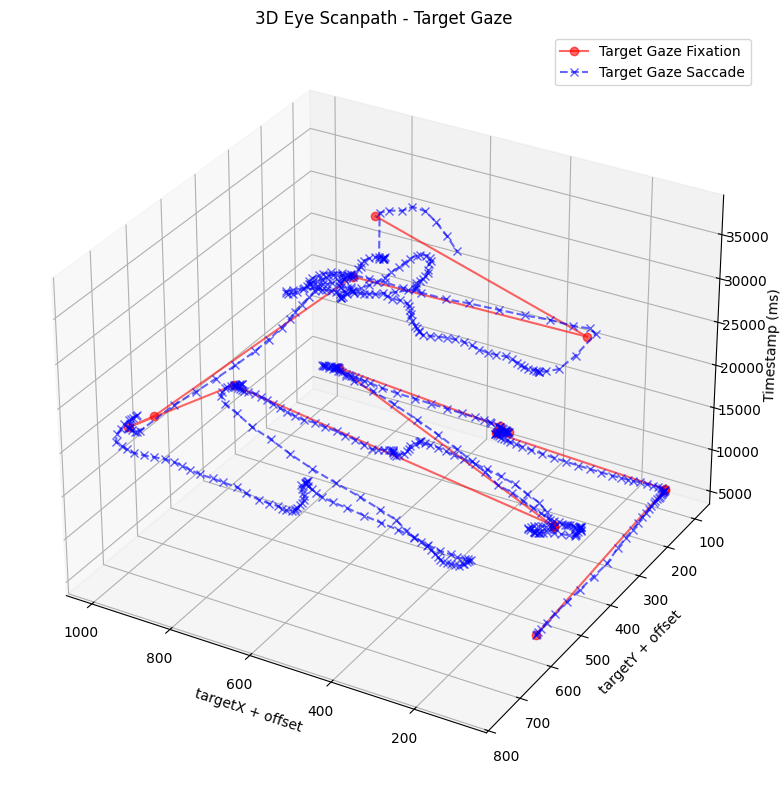

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Load and sort dataset ---
df = df.sort_values(by='timestamp').reset_index(drop=True)

# --- Velocity-based classification function ---
def classify_movements(x, y, timestamp, velocity_threshold=30):
    dx = x.diff()
    dy = y.diff()
    dt = timestamp.diff() / 1000.0  # Convert ms to seconds
    dt[dt == 0] = 1e-5

    velocity = np.sqrt(dx**2 + dy**2) / dt
    movement_type = np.where(velocity < velocity_threshold, 'fixation', 'saccade')
    return velocity.fillna(0), movement_type

# --- Raw gaze movement classification ---
df['velocity'], df['eye_mov_type'] = classify_movements(df['x'], df['y'], df['timestamp'])

# --- Target gaze movement classification ---
df['target_velocity'], df['target_eye_mov_type'] = classify_movements(df['targetX'], df['targetY'], df['timestamp'])

# --- 3D Plotting Function ---
def plot_3d_scanpath(df, x_col, y_col, mov_col, label_prefix="Gaze", offset=0, color_fix='red', color_sac='blue'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Apply offset if needed
    x_vals = df[x_col] + offset
    y_vals = df[y_col] + offset

    fixations = df[df[mov_col] == 'fixation']
    saccades = df[df[mov_col] == 'saccade']

    # Fixations
    ax.plot(fixations[x_col] + offset, fixations[y_col] + offset, fixations['timestamp'],
            color=color_fix, marker='o', linestyle='-', label=f'{label_prefix} Fixation', alpha=0.6)

    # Saccades
    ax.plot(saccades[x_col] + offset, saccades[y_col] + offset, saccades['timestamp'],
            color=color_sac, marker='x', linestyle='--', label=f'{label_prefix} Saccade', alpha=0.6)

    ax.set_xlabel(f"{x_col} + offset")
    ax.set_ylabel(f"{y_col} + offset")
    ax.set_zlabel("Timestamp (ms)")
    ax.set_title(f"3D Eye Scanpath - {label_prefix}")
    ax.legend()
    ax.view_init(elev=30, azim=120)
    plt.tight_layout()
    plt.show()

# --- Plot Raw Gaze ---
plot_3d_scanpath(df, 'x', 'y', 'eye_mov_type', label_prefix="Raw Gaze")

# --- Plot Target Gaze (offset for separation) ---
plot_3d_scanpath(df, 'targetX', 'targetY', 'target_eye_mov_type', label_prefix="Target Gaze", offset=50)


Loaded data with shape: (5588, 7)

=== Dwell Summary (head) ===
   user InteractionCondition InterfaceStyle     aoi_id  dwell_time_ms  hits
0    2                    k        Default  sofa_game        55833.7     1
1    8                    k        Default  sofa_game        67799.9     1

=== AOI Transitions (head) ===
 Empty DataFrame
Columns: [user, InteractionCondition, InterfaceStyle, from, to, count]
Index: []

=== Descriptive Statistics (by mode) ===
     dt_sec_per_aoi                                                           \
              count     mean       std      min       25%      50%       75%   
mode                                                                           
k               2.0  61.8168  8.461381  55.8337  58.82525  61.8168  64.80835   

              total_dwell_t_ms                                           \
          max            count     mean          std      min       25%   
mode                                                               

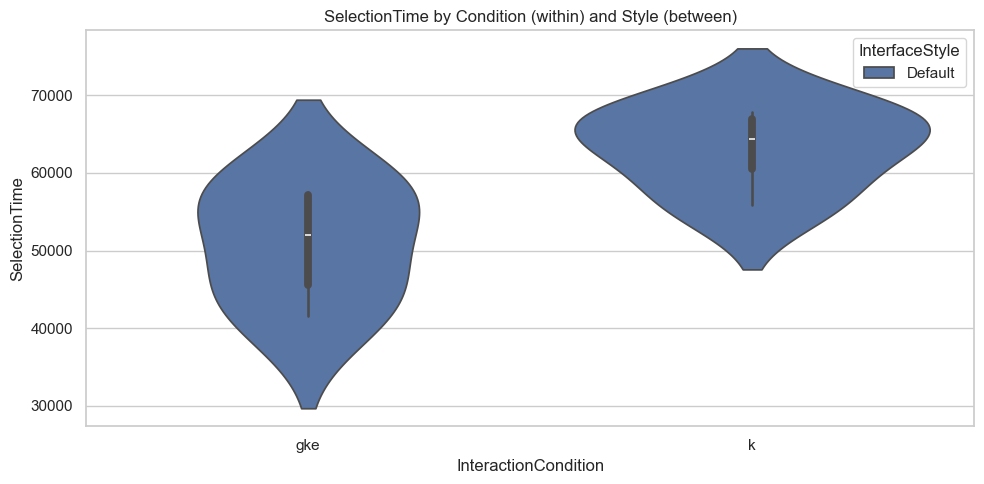

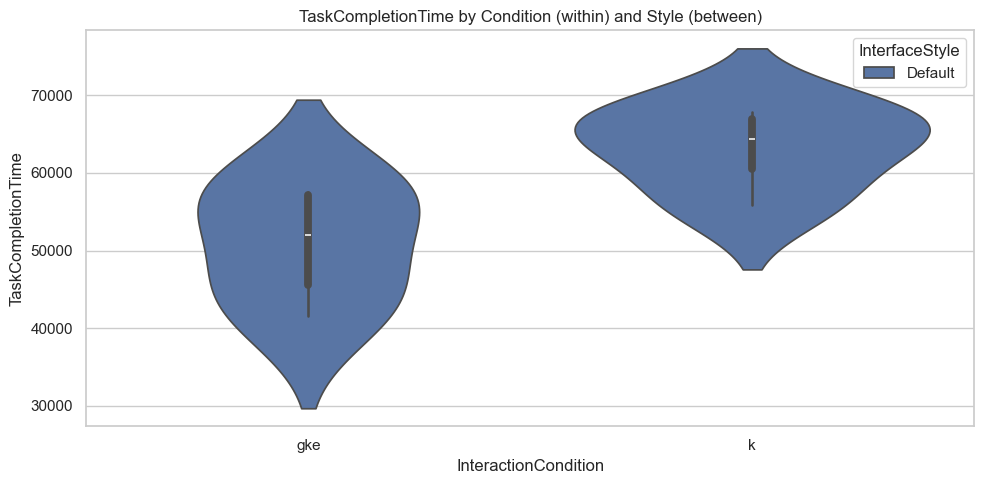

[skip] SUS_Score not available.


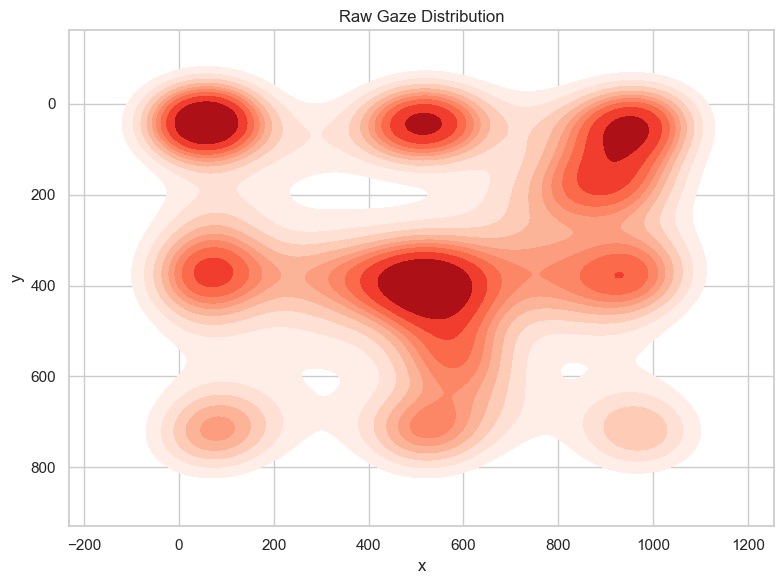

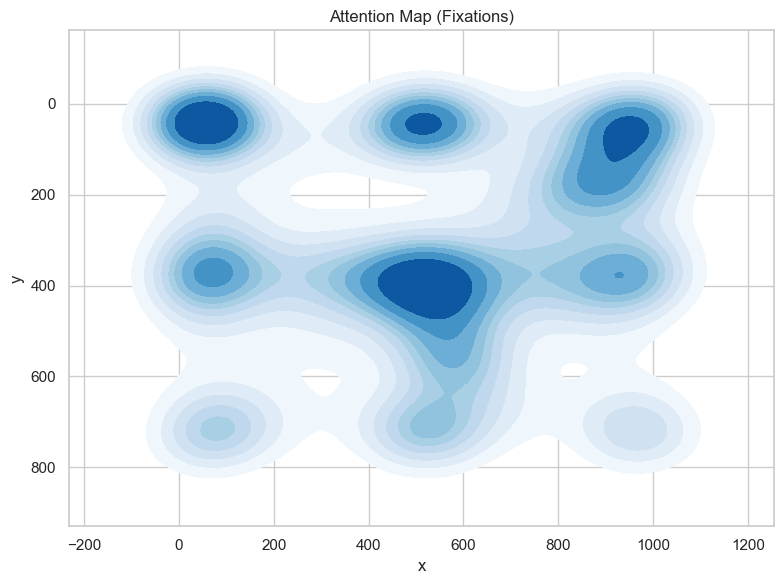

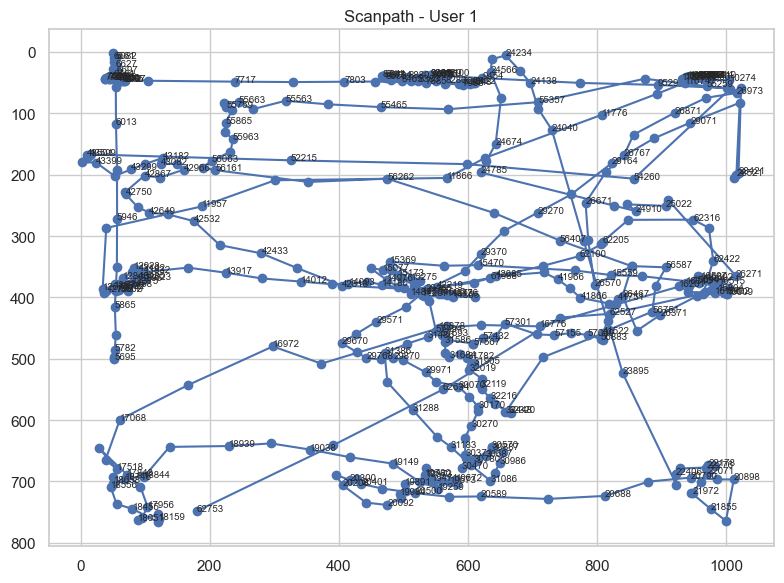


[info] Mixed ANOVA skipped: requires ≥2 within levels, ≥2 between levels, and ≥2 users.
      With the provided starting variables, we only have a single between-subjects level ('Default').
[error] RM-ANOVA failed: cannot convert float NaN to integer


In [46]:
# ============================
# STATISTICAL ANALYSIS & VISUALIZATION (ADAPTED TO: x,y,timestamp,targetX,targetY,mode,lasthit)
# ============================

# --- 0. Imports & Setup ---
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pingouin for ANOVAs (will be used only when design permits)
try:
    import pingouin as pg
except ImportError:
    pg = None
    print("[info] 'pingouin' not installed; advanced ANOVAs will be skipped. Install with: pip install pingouin")

sns.set(context="notebook", style="whitegrid")

# --- 1. Load Data ---
# Expect either an existing DataFrame `df` or a CSV named "combined.csv"
try:
    df  # already defined by caller
except NameError:
    try:
        df = combined  # if your environment defines 'combined'
    except NameError:
        df = pd.read_csv("combined.csv")

print("Loaded data with shape:", df.shape)

# --- 1a. Ensure required starting columns exist / coerce types ---
required_cols = ['x','y','timestamp','targetX','targetY','mode','lasthit']
for c in required_cols:
    if c not in df.columns:
        # create safe defaults if truly missing
        if c in ['x','y','targetX','targetY']:
            df[c] = 0.0
        elif c == 'timestamp':
            df[c] = np.arange(len(df)) * 16.67  # ~60Hz
        elif c == 'mode':
            df[c] = 'ConditionA'
        elif c == 'lasthit':
            df[c] = 0

# Coercions
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce').fillna(method='ffill').fillna(0.0)
df['x'] = pd.to_numeric(df['x'], errors='coerce').fillna(0.0)
df['y'] = pd.to_numeric(df['y'], errors='coerce').fillna(0.0)
df['targetX'] = pd.to_numeric(df['targetX'], errors='coerce').fillna(0.0)
df['targetY'] = pd.to_numeric(df['targetY'], errors='coerce').fillna(0.0)
df['lasthit'] = pd.to_numeric(df['lasthit'], errors='coerce').fillna(0).astype(int)

# --- 1b. Create columns the original script expected ---
# Subject identifier (single participant by default)
if 'user' not in df.columns:
    df['user'] = 'S1'
df['user'] = df['user'].astype(str)

# Map your `mode` to the within-subject factor used later
df['InteractionCondition'] = df['mode'].astype('category')

# Create a between-subjects factor placeholder so plotting code runs; real studies may supply this
if 'InterfaceStyle' not in df.columns:
    df['InterfaceStyle'] = 'Default'
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')

# If no fixation classifier, treat all as fixations so AOI metrics/heatmaps work
if 'type' not in df.columns:
    df['type'] = 'fixation'

# A convenience "mode" string (kept for your original descriptive step)
df['mode'] = df['InteractionCondition'].astype(str)

# --- 1c. Derive trials from `lasthit` ---
# A trial ends on rows where lasthit==1; the next row starts a new trial.
# Trial ID is cumulative sum of lasthit across time within each user.
df = df.sort_values(['user','timestamp']).reset_index(drop=True)
df['trial_id'] = df.groupby('user')['lasthit'].cumsum()

# --- 2. AOI Definitions (from your original script) ---
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]

def point_in_aoi(x, y, aoi):
    return (aoi['x'] <= x <= aoi['x'] + aoi['w']) and (aoi['y'] <= y <= aoi['y'] + aoi['h'])

# --- 3. Fixation -> AOI dwell/hits + transitions (aggregated) ---
def calculate_aoi_hits(data, aois):
    """
    Collapses consecutive 'fixation' rows into episodes, assigns each episode to an AOI
    based on mean(x,y), aggregates dwell (ms) and hits by user x condition x style x AOI,
    and counts AOI->AOI transitions. Assumes timestamp in ms.
    """
    results = []
    transitions_global = []

    # deterministic order
    data = data.sort_values(['user','timestamp']).reset_index(drop=True)

    for user_id, user_data in data.groupby('user', sort=False):
        user_data = user_data.reset_index(drop=True)
        start_idx = None
        previous_aoi = None

        def finalize_fixation(s_idx, e_idx):
            nonlocal previous_aoi  # we update the previous AOI if we found a new one
            if s_idx is None or e_idx is None or e_idx <= s_idx:
                return

            fix_data = user_data.iloc[s_idx:e_idx]
            duration_ms = float(fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0])
            x_mean = float(fix_data['x'].mean())
            y_mean = float(fix_data['y'].mean())

            cond  = fix_data['InteractionCondition'].mode(dropna=False).iloc[0]
            style = fix_data['InterfaceStyle'].mode(dropna=False).iloc[0]
            trial = fix_data['trial_id'].mode(dropna=False).iloc[0]

            current_aoi = None
            for aoi in aois:
                if point_in_aoi(x_mean, y_mean, aoi):
                    current_aoi = aoi['id']
                    break

            if current_aoi is not None:
                results.append({
                    'user': user_id,
                    'InteractionCondition': cond,
                    'InterfaceStyle': style,
                    'trial_id': trial,
                    'aoi_id': current_aoi,
                    'duration_ms': max(duration_ms, 0.0)
                })
                if (previous_aoi is not None) and (previous_aoi != current_aoi):
                    transitions_global.append((user_id, cond, style, previous_aoi, current_aoi))
                previous_aoi = current_aoi

        # iterate rows to find fixation blocks
        for i, row in user_data.iterrows():
            if row.get('type', 'fixation') == 'fixation':
                if start_idx is None:
                    start_idx = i
            else:
                if start_idx is not None:
                    finalize_fixation(start_idx, i)
                    start_idx = None
        # close if ended inside a fixation
        if start_idx is not None:
            finalize_fixation(start_idx, len(user_data))

    dwell_df = pd.DataFrame(results)
    if dwell_df.empty:
        dwell_df = pd.DataFrame(columns=['user','InteractionCondition','InterfaceStyle','trial_id','aoi_id','duration_ms'])

    dwell_summary = (
        dwell_df
        .groupby(['user','InteractionCondition','InterfaceStyle','aoi_id'], as_index=False)
        .agg(dwell_time_ms=('duration_ms','sum'),
             hits=('duration_ms','count'))
    )

    trans_df = pd.DataFrame(transitions_global, columns=['user','InteractionCondition','InterfaceStyle','from','to'])
    if trans_df.empty:
        trans_counts = pd.DataFrame(columns=['user','InteractionCondition','InterfaceStyle','from','to','count'])
    else:
        trans_counts = (
            trans_df
            .groupby(['user','InteractionCondition','InterfaceStyle','from','to'], as_index=False)
            .size()
            .rename(columns={'size':'count'})
        )

    return dwell_summary, trans_counts

dwell_summary, trans_counts = calculate_aoi_hits(df, AOIs)
print("\n=== Dwell Summary (head) ===\n", dwell_summary.head())
print("\n=== AOI Transitions (head) ===\n", trans_counts.head())

# --- 4. Build AOI-derived metrics used in descriptive stats ---
# total_dwell_t_ms: total dwell over all AOIs per user x condition x style
# dt_sec_per_aoi: average dwell per AOI hit (in seconds)
aoi_agg = (
    dwell_summary
    .groupby(['user','InteractionCondition','InterfaceStyle'], as_index=False)
    .agg(total_dwell_t_ms=('dwell_time_ms','sum'),
         total_hits=('hits','sum'))
)
aoi_agg['dt_sec_per_aoi'] = np.where(
    aoi_agg['total_hits'] > 0,
    (aoi_agg['total_dwell_t_ms'] / aoi_agg['total_hits']) / 1000.0,
    np.nan
)
aoi_agg['mode'] = aoi_agg['InteractionCondition'].astype(str)

print("\n=== Descriptive Statistics (by mode) ===")
desc = aoi_agg.groupby('mode')[['dt_sec_per_aoi','total_dwell_t_ms']].describe()
print(desc)

# --- 5. Trial-level DVs derived from lasthit ---
# Define trials per user: each block of rows until lasthit==1 is one trial.
# SelectionTime/TaskCompletionTime = trial duration (ms).
trial_bounds = (
    df.groupby(['user','InteractionCondition','InterfaceStyle','trial_id'])
      .agg(t_start=('timestamp','min'),
           t_end=('timestamp','max'),
           n_rows=('timestamp','size'))
      .reset_index()
)
trial_bounds['SelectionTime'] = trial_bounds['t_end'] - trial_bounds['t_start']
trial_bounds['TaskCompletionTime'] = trial_bounds['SelectionTime']

# If you have a questionnaire, you could merge SUS_Score per trial here.
# For now, it will be absent, and plots/ANOVA will skip it.

# Aggregate to subject x condition x style (means across trials)
trial_summary = (
    trial_bounds
      .groupby(['user','InteractionCondition','InterfaceStyle'], as_index=False)
      .agg(SelectionTime=('SelectionTime','mean'),
           TaskCompletionTime=('TaskCompletionTime','mean'))
)

# --- 6. Statistical Graphics ---
def plot_violin_box(dv):
    if dv not in trial_summary.columns:
        print(f"[skip] {dv} not available.")
        return
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='InteractionCondition', y=dv, hue='InterfaceStyle',
                   data=trial_summary, inner='box')
    plt.title(f'{dv} by Condition (within) and Style (between)')
    plt.tight_layout()
    plt.show()

for dv in ['SelectionTime', 'TaskCompletionTime', 'SUS_Score']:
    plot_violin_box(dv)

# --- 7. Gaze Distribution Heatmap (raw) ---
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['x'], y=df['y'], cmap="Reds", fill=True, thresh=0.05)
plt.title("Raw Gaze Distribution")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- 8. Attention Map (Fixations only) ---
fixations = df[df['type'] == 'fixation']
if not fixations.empty:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=fixations['x'], y=fixations['y'], cmap="Blues", fill=True, thresh=0.05)
    plt.title("Attention Map (Fixations)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("[info] No fixations found for attention map.")

# --- 9. Scanpath Visualization ---
def plot_scanpath(user_id):
    user_fix = df[(df['user'] == str(user_id)) & (df['type'] == 'fixation')].sort_values('timestamp')
    if user_fix.shape[0] < 2:
        print(f"[info] Not enough fixation samples to plot scanpath for user {user_id}.")
        return
    plt.figure(figsize=(8, 6))
    plt.plot(user_fix['x'].values, user_fix['y'].values, marker='o', linestyle='-')
    # label a subset to avoid clutter
    step = max(1, len(user_fix)//200)
    for _, row in user_fix.iloc[::step].iterrows():
        plt.text(row['x'], row['y'], f"{int(round(row['timestamp']))}", fontsize=7)
    plt.gca().invert_yaxis()
    plt.title(f'Scanpath - User {user_id}')
    plt.tight_layout()
    plt.show()

sample_user = df['user'].unique()[0]
plot_scanpath(sample_user)

# --- 10. Inferential Statistics ---
# 10a) Mixed ANOVA on trial DVs requires:
#   - at least 2 within levels (InteractionCondition)
#   - at least 2 between levels (InterfaceStyle)
#   - multiple subjects (user) with complete cells
# With your starting variables, InterfaceStyle has one level → mixed ANOVA is not applicable.
if pg is not None:
    levels_within = df['InteractionCondition'].nunique()
    levels_between = df['InterfaceStyle'].nunique()
    n_users = df['user'].nunique()

    if levels_within >= 2 and levels_between >= 2 and n_users >= 2:
        print("\n[info] Running mixed ANOVA on derived DV: SelectionTime")
        try:
            aov = pg.mixed_anova(dv='SelectionTime',
                                 within='InteractionCondition',
                                 between='InterfaceStyle',
                                 subject='user',
                                 data=trial_summary.dropna(subset=['SelectionTime']),
                                 correction=True, effsize='np2')
            print(aov)
            # --- Interpretation comments ---
            def _comment(row, label):
                p = row.get('p-unc', np.nan)
                np2 = row.get('np2', np.nan)
                sig = "significant" if (p < 0.05) else "not significant"
                eff = "" if pd.isna(np2) else f" (partial η² = {np2:.3f})"
                print(f"- {label}: {sig} (p = {p:.4f}){eff}")
            for term in ['InteractionCondition','InterfaceStyle','InteractionCondition * InterfaceStyle']:
                r = aov[aov['Source'] == term]
                if not r.empty:
                    _comment(r.iloc[0], term)
        except Exception as e:
            print(f"[error] Mixed ANOVA failed: {e}")
    else:
        print("\n[info] Mixed ANOVA skipped: requires ≥2 within levels, ≥2 between levels, and ≥2 users.")
        print("      With the provided starting variables, we only have a single between-subjects level ('Default').")

# 10b) Exploratory within-subject effect of `mode` on SelectionTime (only if multiple modes and users)
# If you later add multiple users, you can use:
#   pg.rm_anova(dv='SelectionTime', within='InteractionCondition', subject='user', data=trial_summary)
if pg is not None and df['user'].nunique() >= 2 and df['InteractionCondition'].nunique() >= 2:
    try:
        rm = pg.rm_anova(dv='SelectionTime', within='InteractionCondition', subject='user',
                         data=trial_summary.dropna(subset=['SelectionTime']), detailed=True)
        print("\n==== Repeated-measures ANOVA: SelectionTime by InteractionCondition ====\n", rm)
        # Comment
        p = rm.loc[rm['Source']=='InteractionCondition','p-GG-corr'].squeeze()
        np2 = rm.loc[rm['Source']=='InteractionCondition','np2'].squeeze()
        sig = "significant" if p < 0.05 else "not significant"
        print(f"- Main effect of InteractionCondition is {sig} (p = {p:.4f}, partial η² = {np2:.3f}).")
    except Exception as e:
        print(f"[error] RM-ANOVA failed: {e}")


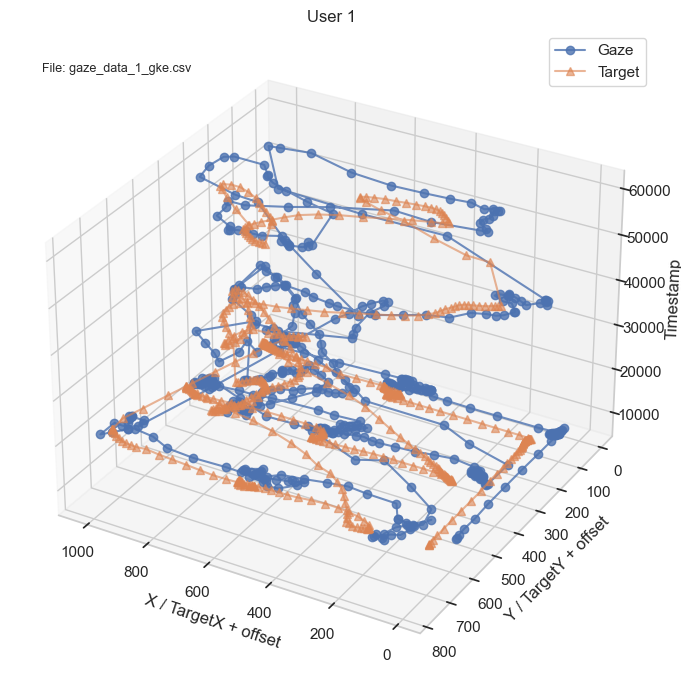

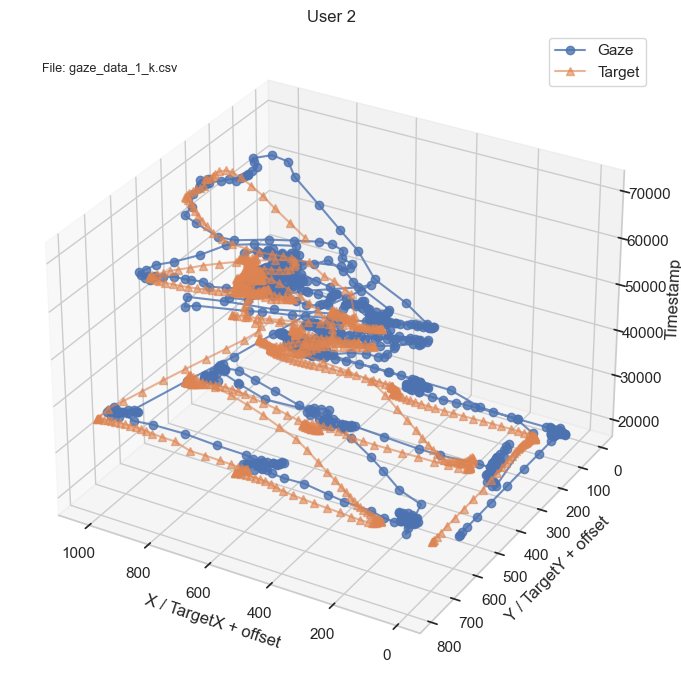

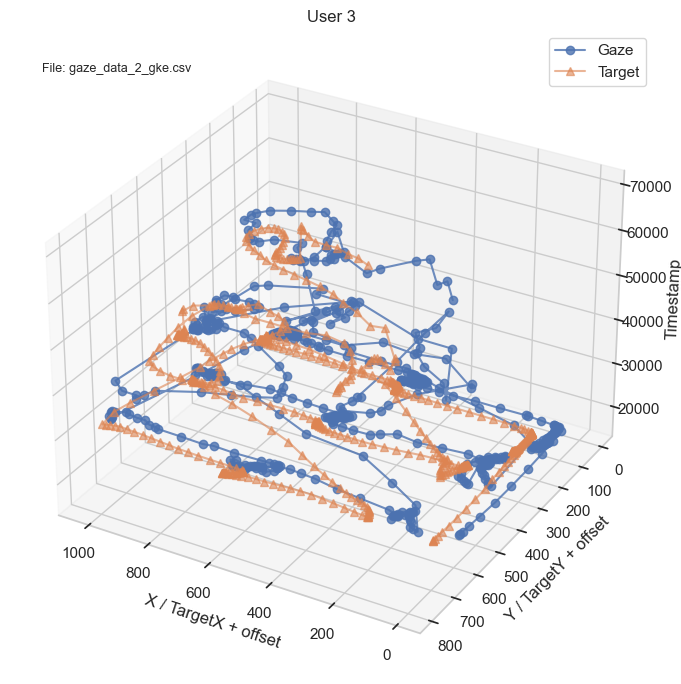

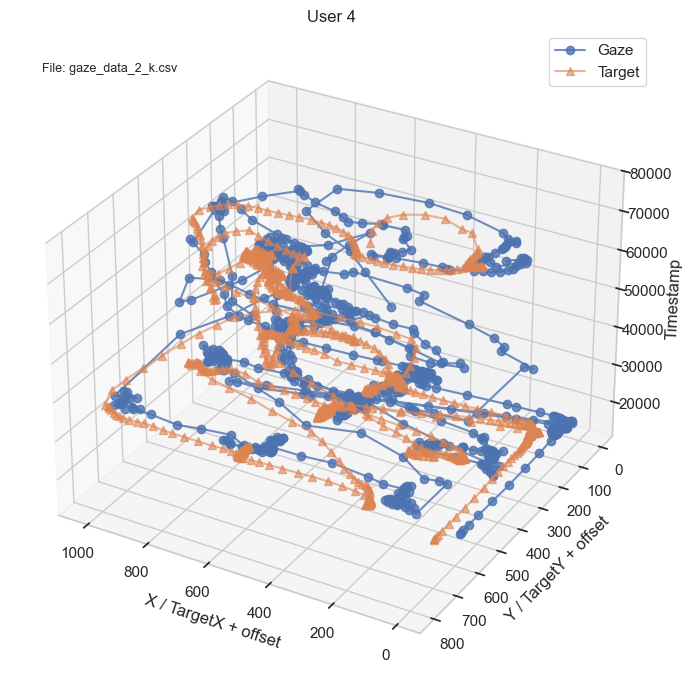

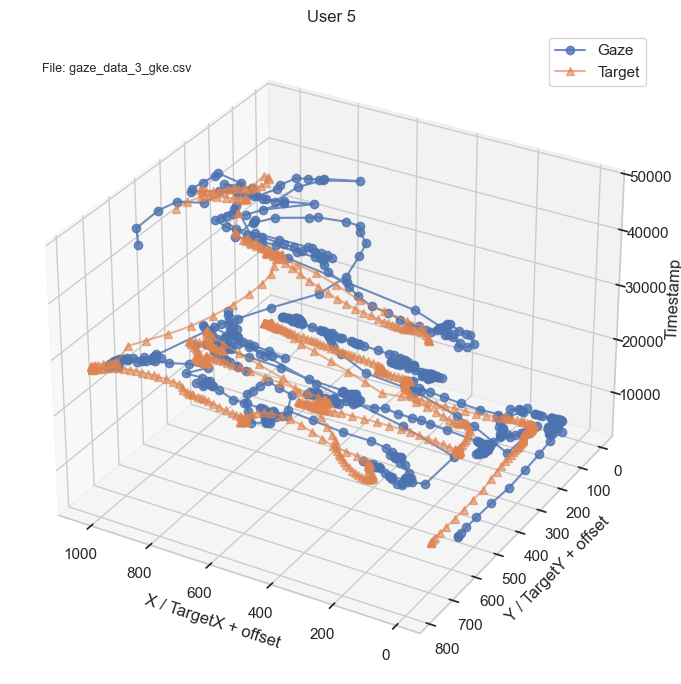

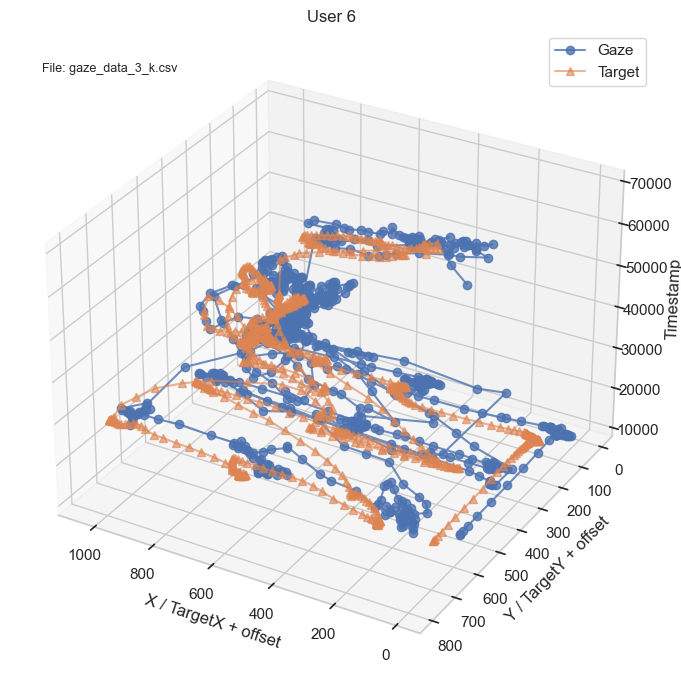

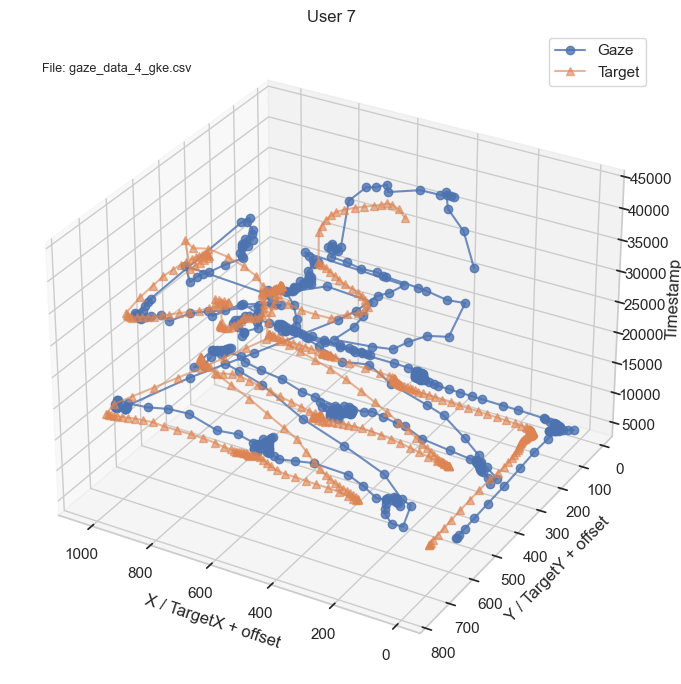

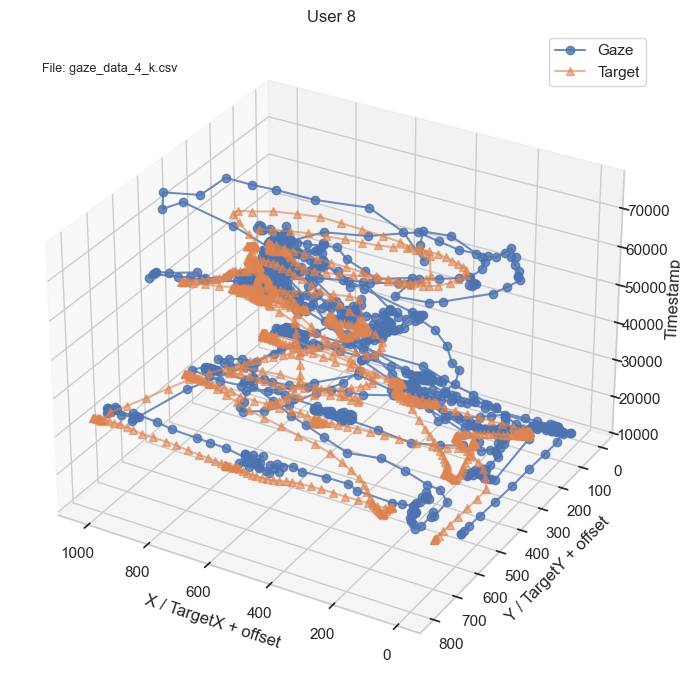

In [45]:
import os, glob, re
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# ---------- Load & stack ----------
files = sorted(glob.glob("./data/gaze_data_[1-4]_*.csv"))
if not files:
    raise FileNotFoundError("No matching 'gaze_data_[1-4]_*.csv' files found.")

def user_id_from_name(name, fallback):
    m = re.search(r"\((\d+)\)", name)
    return int(m.group(1)) if m else fallback

df_list = []
file_lookup = {}  # user_id -> filename
for i, path in enumerate(files, 1):
    user_id = user_id_from_name(os.path.basename(path), i)
    df = pd.read_csv(path)
    df["user"] = user_id
    df_list.append(df)
    file_lookup[user_id] = os.path.basename(path)

df = pd.concat(df_list, ignore_index=True)
df["timestamp"] = pd.to_numeric(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"]).sort_values(["user", "timestamp"]).reset_index(drop=True)

# ---------- Plotting ----------
def plot_3d_scanpath(ax, data, title, offset=50, show_target=True):
    ax.plot(data["x"], data["y"], data["timestamp"], label="Gaze", marker="o", alpha=0.8)
    if show_target and {"targetX", "targetY"}.issubset(data.columns):
        ax.plot(data["targetX"] + offset, data["targetY"] + offset, data["timestamp"],
                label="Target", marker="^", alpha=0.6)
    ax.set(xlabel="X / TargetX + offset", ylabel="Y / TargetY + offset", zlabel="Timestamp", title=title)
    ax.view_init(30, 120)

# ---------- Per-user plots ----------
for uid, user_data in df.groupby("user", sort=True):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")
    plot_3d_scanpath(ax, user_data, title=f"User {uid}")

    # Show filename on plot
    filename = file_lookup.get(uid, "Unknown file")
    ax.text2D(0.05, 0.95, f"File: {filename}", transform=ax.transAxes, fontsize=9, verticalalignment='top')

    ax.legend()
    plt.tight_layout()
    plt.show()


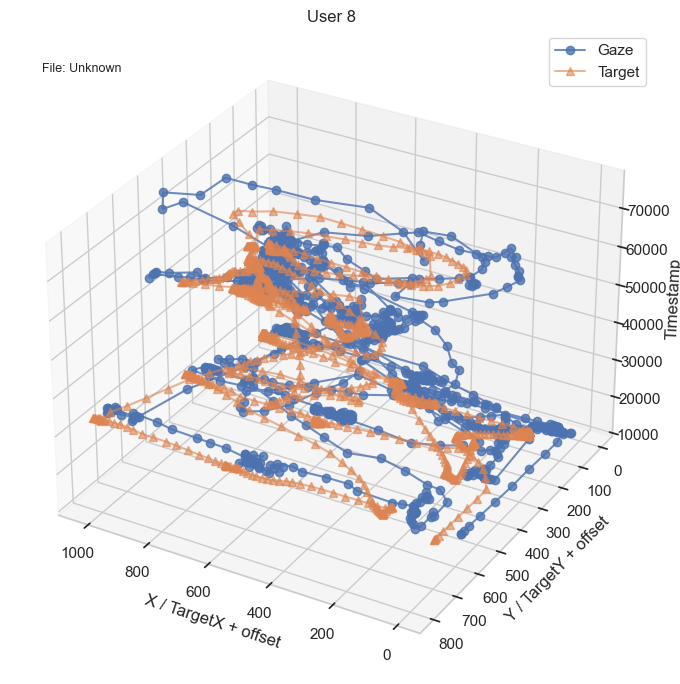

In [44]:
# ---------- Per-user plots with filename ----------
for i, (uid, user_data) in enumerate(df.groupby("user", sort=True)):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")
    plot_3d_scanpath(ax, user_data, title=f"User {uid}")

    # Get the file that matches this user (assumes one file per user)
    match = [f for f in files if str(uid) in f]
    filename = os.path.basename(match[0]) if match else "Unknown"

    # Add filename to plot (top-left corner)
    ax.text2D(0.05, 0.95, f"File: {filename}", transform=ax.transAxes, fontsize=9, verticalalignment='top')

    ax.legend()
    plt.tight_layout()
    plt.show()



In [37]:
#STATISTICAL ANALYSIS

#Calculating eye movement types using I-VT classifier into Saccades and Fixations

import pandas as pd
import numpy as np

def ivt_classifier(data, px_per_deg, threshold_deg_s=50, min_duration_ms=100):
    """
    Apply I-VT classifier to raw eye-tracking data.
    
    Parameters:
    - data: DataFrame with columns ["timestamp", "x", "y"]
    - px_per_deg: float, pixels per degree of visual angle
    - threshold_deg_s: velocity threshold in deg/sec (typically 20–50)
    - min_duration_ms: minimum fixation duration in milliseconds

    Returns:
    - DataFrame with added 'type' column: 'fixation' or 'saccade'
    """
    data = combined.sort_values('timestamp').reset_index(drop=True)
    
    # Compute velocity in px/sec
    dt = data['timestamp'].diff().fillna(1) / 1000.0  # avoid div by zero
    dx = data['x'].diff().fillna(0)
    dy = data['y'].diff().fillna(0)
    velocity_px_s = np.sqrt(dx**2 + dy**2) / dt

    # Convert to deg/sec
    velocity_deg_s = velocity_px_s / px_per_deg

    # Mark low-velocity samples as potential fixations
    is_fixation = velocity_deg_s < threshold_deg_s

    # Label sequences
    labels = []
    current_label = None
    start_time = None

    for i, fix in enumerate(is_fixation):
        t = data['timestamp'].iloc[i]
        if fix:
            if current_label != 'fixation':
                # Start of a potential fixation
                start_time = t
                current_label = 'fixation'
            labels.append('fixation')
        else:
            if current_label == 'fixation':
                duration = t - start_time
                if duration < min_duration_ms:
                    # Too short to be a fixation: re-label as saccade
                    labels[-(i - labels.count('saccade')):] = ['saccade'] * (i - labels.count('saccade'))
                current_label = 'saccade'
            labels.append('saccade')

    # Pad label list if needed
    if len(labels) < len(data):
        labels += ['saccade'] * (len(data) - len(labels))

    data['type'] = labels
    return data


In [32]:
import pandas as pd

def summarize_fixation_data(results):
    """
    Summarize fixation data by user and AOI (Area of Interest).

    Parameters:
        results (list of dicts): Each dict should contain
            - 'user': unique session/user identifier
            - 'aoi_id': string/label of the area of interest
            - 'fixation_duration_ms': duration of fixation in milliseconds

    Returns:
        pd.DataFrame: aggregated summary per user and AOI
    """
    # Convert to DataFrame
    df_results = pd.DataFrame(results)

    # Group and aggregate
    summary = df_results.groupby(['user', 'aoi_id']).agg(
        total_dwell_time_ms=('fixation_duration_ms', 'sum'),
        fixation_hits=('fixation_duration_ms', 'count')
    ).reset_index()

    return summary


In [41]:

# --- Your AOIs definition ---
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]
data = combined.sort_values('timestamp').reset_index(drop=True)
# --- Helper: check if a point is inside AOI ---
def point_in_aoi(x, y, aoi):
    return (
        aoi['x'] <= x <= aoi['x'] + aoi['w'] and
        aoi['y'] <= y <= aoi['y'] + aoi['h']
    )

# --- AOI Hit & Dwell Time Calculation ---
def calculate_aoi_hits(data, aois):
    results = []

    # Group by user
    for user_id, user_data in data.groupby('user'):
        user_data = user_data.reset_index(drop=True)

        # Track fixation blocks
        start_idx = None

        for i in range(len(user_data)):
            row = user_data.iloc[i]

            if row['type'] == 'fixation':
                if start_idx is None:
                    start_idx = i
            else:
                if start_idx is not None:
                    fix_data = user_data.iloc[start_idx:i]
                    duration = fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0]
                    x_mean = fix_data['x'].mean()
                    y_mean = fix_data['y'].mean()

                    for aoi in aois:
                        if point_in_aoi(x_mean, y_mean, aoi):
                            results.append({
                                'user': user_id,
                                'aoi_id': aoi['id'],
                                'fixation_duration_ms': duration
                            })

                    start_idx = None  # Reset for next fixation

    # Convert and aggregate
    df_results = pd.DataFrame(results)
    summary = df_results.groupby(['user', 'aoi_id']).agg(
        total_dwell_time_ms=('fixation_duration_ms', 'sum'),
        fixation_hits=('fixation_duration_ms', 'count')
    ).reset_index()

    return summary

# After running ivt_classifier
px_per_deg = 50
data = ivt_classifier(combined, px_per_deg=px_per_deg)

# Calculate AOI stats
aoi_summary = calculate_aoi_hits(data, AOIs)

print(aoi_summary)

  user     aoi_id  total_dwell_time_ms  fixation_hits
0    4  bookshelf                 93.9              1
1    5  bookshelf                400.0              1
2    8  bookshelf               1847.1              1
3    8         tv                389.7              1


In [28]:
import pandas as pd
import math

def point_in_aoi(x, y, aoi):
    return (aoi['x'] <= x <= aoi['x'] + aoi['w'] and
            aoi['y'] <= y <= aoi['y'] + aoi['h'])

def calculate_aoi_hits(data, aois):
    results = []

    for user_id, user_data in data.groupby('user'):
        user_data = user_data.reset_index(drop=True)
        start_idx = None

        for i in range(len(user_data)):
            row = user_data.iloc[i]
            is_fix = str(row['type']).lower() == 'fixation'

            if is_fix:
                if start_idx is None:
                    start_idx = i
            else:
                if start_idx is not None:
                    fix_data = user_data.iloc[start_idx:i]
                    if not fix_data.empty:
                        duration = fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0]
                        x_mean = pd.to_numeric(fix_data['x'], errors='coerce').mean()
                        y_mean = pd.to_numeric(fix_data['y'], errors='coerce').mean()
                        if not (math.isnan(x_mean) or math.isnan(y_mean)):
                            for aoi in aois:
                                if point_in_aoi(x_mean, y_mean, aoi):
                                    results.append({'user': user_id,
                                                    'aoi_id': aoi['id'],
                                                    'fixation_duration_ms': duration})
                    start_idx = None

        # close a fixation that runs to the end
        if start_idx is not None:
            fix_data = user_data.iloc[start_idx:]
            if not fix_data.empty:
                duration = fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0]
                x_mean = pd.to_numeric(fix_data['x'], errors='coerce').mean()
                y_mean = pd.to_numeric(fix_data['y'], errors='coerce').mean()
                if not (math.isnan(x_mean) or math.isnan(y_mean)):
                    for aoi in aois:
                        if point_in_aoi(x_mean, y_mean, aoi):
                            results.append({'user': user_id,
                                            'aoi_id': aoi['id'],
                                            'fixation_duration_ms': duration})

    df_results = pd.DataFrame(results)

    # EMPTY GUARD to avoid KeyError
    if df_results.empty:
        return pd.DataFrame(columns=['user', 'aoi_id', 'total_dwell_time_ms', 'fixation_hits'])

    summary = df_results.groupby(['user', 'aoi_id']).agg(
        total_dwell_time_ms=('fixation_duration_ms', 'sum'),
        fixation_hits=('fixation_duration_ms', 'count')
    ).reset_index()

    return summary


In [29]:
#add a line to aggregate the results by user by summing total dwell time for the whole session
aoi_summary_total = summary.groupby('user').agg(
    total_dwell_t_ms=('total_dwell_t_ms', 'sum'),
    total_hits=('fixation_hits', 'sum')
).reset_index()

#add a line to aggregate the results by AOI by summing total dwell time for each AOI per user
hit_sec_per_aoi = summary.groupby('aoi_id').agg(
    total_dwell_t_ms=('total_dwell_time_ms', 'sum'),
    total_hits=('fixation_hits', 'sum'))


NameError: name 'summary' is not defined

In [27]:
#STATISTICAL ANALYSIS AND VISUALIZATION  

# === 1. Load Data ===
#df = pd.read_csv("combined.csv")
df = combined
print("Loaded data with shape:", df.shape)

# === 2. Descriptive Statistics ===
print("\n=== Descriptive Statistics ===")
desc = df.groupby(['mode'])[['dt_sec_per_aoi', 'total_dwell_t_ms']].describe()
print(desc)

# === 3. Statistical Graphics ===
def plot_violin_box(dv):
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='InteractionCondition', y=dv, hue='InterfaceStyle', data=df, inner='box')
    plt.title(f'{dv} by Condition and Style')
    plt.tight_layout()
    plt.show()

for dv in ['SelectionTime', 'SUS_Score', 'TaskCompletionTime']:
    plot_violin_box(dv)

# === 4. Gaze Distribution Heatmap ===
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['x'], y=df['y'], cmap="Reds", fill=True, thresh=0.05)
plt.title("Raw Gaze Distribution")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 5. AOI Hits, Dwell, and Transitions ===
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]

def point_in_aoi(x, y, aoi):
    return aoi['x'] <= x <= aoi['x'] + aoi['w'] and aoi['y'] <= y <= aoi['y'] + aoi['h']

def calculate_aoi_hits(data, aois):
    results = []
    for user_id, user_data in data.groupby('user'):
        user_data = user_data.reset_index(drop=True)
        start_idx = None
        previous_aoi = None
        transitions = []

        for i in range(len(user_data)):
            row = user_data.iloc[i]
            if row['type'] == 'fixation':
                if start_idx is None:
                    start_idx = i
            else:
                if start_idx is not None:
                    fix_data = user_data.iloc[start_idx:i]
                    duration = fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0]
                    x_mean = fix_data['x'].mean()
                    y_mean = fix_data['y'].mean()

                    for aoi in aois:
                        if point_in_aoi(x_mean, y_mean, aoi):
                            current_aoi = aoi['id']
                            results.append({'user': user_id, 'aoi_id': current_aoi, 'duration': duration})
                            if previous_aoi and previous_aoi != current_aoi:
                                transitions.append((previous_aoi, current_aoi))
                            previous_aoi = current_aoi
                    start_idx = None

    dwell_df = pd.DataFrame(results)
    dwell_summary = dwell_df.groupby(['user', 'aoi_id']).agg(
        dwell_time=('duration', 'sum'),
        hits=('duration', 'count')
    ).reset_index()

    transition_df = pd.DataFrame(transitions, columns=['from', 'to'])
    trans_counts = transition_df.groupby(['from', 'to']).size().reset_index(name='count')

    return dwell_summary, trans_counts

# Make sure 'type' column exists (i.e., run classifier)
if 'type' not in df.columns:
    print("Missing 'type' column. Run fixation classifier first.")
else:
    dwell_summary, trans_counts = calculate_aoi_hits(df, AOIs)
    print("\n=== Dwell Summary ===\n", dwell_summary.head())
    print("\n=== AOI Transitions ===\n", trans_counts.head())

# === 6. Attention Map (Fixation Heatmap) ===
fixations = df[df['type'] == 'fixation']
plt.figure(figsize=(8, 6))
sns.kdeplot(x=fixations['x'], y=fixations['y'], cmap="Blues", fill=True, thresh=0.05)
plt.title("Attention Map (Fixations)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 7. Scanpath Visualization ===
def plot_scanpath(user_id):
    user_data = df[(df['user'] == user_id) & (df['type'] == 'fixation')]
    plt.figure(figsize=(8, 6))
    plt.plot(user_data['x'], user_data['y'], marker='o', linestyle='-')
    for i, row in user_data.iterrows():
        plt.text(row['x'], row['y'], f"{int(row['timestamp'])}", fontsize=8)
    plt.gca().invert_yaxis()
    plt.title(f'Scanpath - User {user_id}')
    plt.tight_layout()
    plt.show()

sample_user = df['user'].unique()[0]
plot_scanpath(sample_user)

# === 8. Mixed ANOVA ===
df['user'] = df['user'].astype(str)
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')
df['InteractionCondition'] = df['InteractionCondition'].astype('category')

def run_mixed_anova(dv):
    print(f"\n==== Mixed ANOVA: {dv} ====")
    aov = pg.mixed_anova(dv=dv,
                         within='InteractionCondition',
                         between='InterfaceStyle',
                         subject='user',
                         data=df,
                         correction=True,
                         effsize='np2')
    print(aov)
    return aov

for dv in ['SelectionTime', 'SUS_Score', 'TaskCompletionTime']:
    run_mixed_anova(dv)


Loaded data with shape: (5588, 7)

=== Descriptive Statistics ===


KeyError: "Columns not found: 'dt_sec_per_aoi', 'total_dwell_t_ms'"

In [33]:
pip install pingouin


  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.7 MB 6.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.2/8.7 MB 8.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.6 MB 13.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 13.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 12.0 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ---------------------------------------- 0.0/1.3 M


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#nope not really

import pandas as pd
import pingouin as pg

# === Load and inspect data ===
df = pd.read_csv("C:/Users/nisae/OneDrive/Masaüstü/Yeni klasör/Gazeninja/gaze_data (8).csv")
print("Columns:", df.columns.tolist())
print("Preview:\n", df.head())
print("NA counts:\n", df.isna().sum())

# === Sanity check: unique values in IVs ===
print("\nUnique Interface Styles:", df['InterfaceStyle'].unique())
print("Unique Conditions:", df['InteractionCondition'].unique())

# === Convert necessary columns to category ===
df['user'] = df['user'].astype(str)  # Ensure 'user' is treated as identifier
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')
df['InteractionCondition'] = df['InteractionCondition'].astype('category')

# === Mixed ANOVA function for each DV ===
def run_mixed_anova(dv):
    print(f"\n==== Running Mixed ANOVA for {dv} ====")
    aov = pg.mixed_anova(dv=dv,
                         within='InteractionCondition',
                         between='InterfaceStyle',
                         subject='user',
                         data=df,
                         correction=True,
                         effsize='np2')  # partial eta squared
    print(aov)
    return aov

# === Run for all dependent variables ===
results = {
    'SelectionTime': run_mixed_anova('SelectionTime'),
    'SUS_Score': run_mixed_anova('SUS_Score'),
    'TaskCompletionTime': run_mixed_anova('TaskCompletionTime')
}

# === Post-hocs if needed ===
# Example: post-hoc for InterfaceStyle if main effect is significant
posthoc_interface = pg.pairwise_tests(dv='SelectionTime',
                                      between='InterfaceStyle',
                                      parametric=True,
                                      padjust='bonf',
                                      data=df)
print("\nPost-hoc (Interface Style):\n", posthoc_interface)


Columns: ['x', 'y', 'timestamp', 'targetX', 'targetY', 'mode']
Preview:
       x     y  timestamp  targetX  targetY mode
0   0.0  55.0     3897.6     0.00    55.00   ge
1   9.0  72.0     3950.5     1.35    57.55   ge
2   2.0  47.0     4032.0     1.45    55.97   ge
3  27.0  61.0     4064.7     5.28    56.72   ge
4  39.0  56.0     4098.4    10.34    56.61   ge
NA counts:
 x            0
y            0
timestamp    0
targetX      0
targetY      0
mode         0
dtype: int64


KeyError: 'InterfaceStyle'

In [ ]:

# === Load and inspect data ===
df = pd.read_csv("combined.csv")
print("Columns:", df.columns.tolist())
print("Preview:\n", df.head())
print("NA counts:\n", df.isna().sum())

# === Sanity check: unique values in IVs ===
print("\nUnique Interface Styles:", df['InterfaceStyle'].unique())
print("Unique Conditions:", df['InteractionCondition'].unique())

# === Convert necessary columns to category ===
df['user'] = df['user'].astype(str)  # Ensure 'user' is treated as identifier
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')
df['InteractionCondition'] = df['InteractionCondition'].astype('category')

# === Mixed ANOVA function for each DV ===
def run_mixed_anova(dv):
    print(f"\n==== Running Mixed ANOVA for {dv} ====")
    aov = pg.mixed_anova(dv=dv,
                         within='InteractionCondition',
                         between='InterfaceStyle',
                         subject='user',
                         data=df,
                         correction=True,
                         effsize='np2')  # partial eta squared
    print(aov)
    return aov

# === Run for all dependent variables ===
results = {
    'SelectionTime': run_mixed_anova('SelectionTime'),
    'SUS_Score': run_mixed_anova('SUS_Score'),
    'TaskCompletionTime': run_mixed_anova('TaskCompletionTime')
}

# === Post-hocs if needed ===
# Example: post-hoc for InterfaceStyle if main effect is significant
posthoc_interface = pg.pairwise_tests(dv='SelectionTime',
                                      between='InterfaceStyle',
                                      parametric=True,
                                      padjust='bonf',
                                      data=df)
print("\nPost-hoc (Interface Style):\n", posthoc_interface)


ModuleNotFoundError: No module named 'pingouin'

In [50]:
import os
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pingouin as pg

# ----------------- Parameters -----------------
PX_PER_DEG = 50
VELOCITY_THRESHOLD_DEG_S = 50
MIN_FIX_DURATION_MS = 100
OUTPUT_DIR = "output/plots"

# ----------------- Load & Combine Gaze Data -----------------
def user_id_from_name(name, fallback):
    m = re.search(r"\((\d+)\)", name)
    return int(m.group(1)) if m else fallback

file_paths = sorted(glob.glob("data/gaze_data_*.csv"))
if not file_paths:
    raise FileNotFoundError("No gaze_data_*.csv files found in ./data")

df_list = []
for i, path in enumerate(file_paths, 1):
    df = pd.read_csv(path)
    df["user"] = user_id_from_name(path, fallback=i)
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)
data["timestamp"] = pd.to_numeric(data["timestamp"], errors="coerce")
data = data.dropna(subset=["timestamp"]).sort_values(["user", "timestamp"]).reset_index(drop=True)

print(f"[INFO] Loaded and combined {len(file_paths)} files. Total rows: {len(data)}")

# ----------------- AOI Definitions -----------------
AOIs = [
    {'id': 'bookshelf', 'x': 44, 'y': 36, 'w': 249, 'h': 526},
    {'id': 'sofa_web', 'x': 350, 'y': 309, 'w': 127, 'h': 124},
    {'id': 'sofa_game', 'x': 543, 'y': 301, 'w': 123, 'h': 124},
    {'id': 'phone', 'x': 704, 'y': 284, 'w': 131, 'h': 125},
    {'id': 'lamp', 'x': 812, 'y': 87, 'w': 107, 'h': 134},
    {'id': 'tv', 'x': 842, 'y': 275, 'w': 171, 'h': 198},
    {'id': 'files', 'x': 500, 'y': 465, 'w': 101, 'h': 89}
]

def point_in_aoi(x, y, aoi):
    return aoi['x'] <= x <= aoi['x'] + aoi['w'] and aoi['y'] <= y <= aoi['y'] + aoi['h']

# ----------------- I-VT Classifier -----------------
def ivt_classifier(df):
    df = df.copy()
    df = df.sort_values('timestamp').reset_index(drop=True)

    dt = df['timestamp'].diff().fillna(1) / 1000.0
    dx = df['x'].diff().fillna(0)
    dy = df['y'].diff().fillna(0)
    velocity_px_s = np.sqrt(dx**2 + dy**2) / dt
    velocity_deg_s = velocity_px_s / PX_PER_DEG
    is_fixation = velocity_deg_s < VELOCITY_THRESHOLD_DEG_S

    labels = [''] * len(df)
    i = 0

    while i < len(df):
        if is_fixation[i]:
            start = i
            while i < len(df) and is_fixation[i]:
                i += 1
            end = i
            duration = df.loc[end - 1, 'timestamp'] - df.loc[start, 'timestamp']
            label = 'fixation' if duration >= MIN_FIX_DURATION_MS else 'saccade'
            for j in range(start, end):
                labels[j] = label
        else:
            labels[i] = 'saccade'
            i += 1

    df['type'] = labels
    return df

data = ivt_classifier(data)
print("[INFO] Applied I-VT classifier.")

# ----------------- AOI Dwell Time Calculation -----------------
def calculate_aoi_hits(df, aois):
    results = []

    for user_id, user_data in df.groupby("user"):
        user_data = user_data.reset_index(drop=True)
        start_idx = None

        for i, row in user_data.iterrows():
            if row["type"] == "fixation":
                if start_idx is None:
                    start_idx = i
            elif start_idx is not None:
                fix = user_data.iloc[start_idx:i]
                duration = fix["timestamp"].iloc[-1] - fix["timestamp"].iloc[0]
                x_mean, y_mean = fix["x"].mean(), fix["y"].mean()
                for aoi in aois:
                    if point_in_aoi(x_mean, y_mean, aoi):
                        results.append({
                            "user": user_id,
                            "aoi_id": aoi["id"],
                            "fixation_duration_ms": duration
                        })
                start_idx = None
    return pd.DataFrame(results)

aoi_hits = calculate_aoi_hits(data, AOIs)
aoi_summary = aoi_hits.groupby(["user", "aoi_id"]).agg(
    total_dwell_time_ms=('fixation_duration_ms', 'sum'),
    fixation_hits=('fixation_duration_ms', 'count')
).reset_index()

print("[INFO] AOI dwell time calculated.")
print(aoi_summary)

# ----------------- Visualization (Save to File) -----------------
def save_plot(fig, user_id, plot_name):
    user_dir = os.path.join(OUTPUT_DIR, f"user_{user_id}")
    os.makedirs(user_dir, exist_ok=True)
    fig.savefig(os.path.join(user_dir, f"{plot_name}.png"))
    plt.close(fig)

def plot_scanpath_2d(df, user_id):
    user_data = df[(df['user'] == user_id) & (df['type'] == 'fixation')]
    if user_data.empty:
        print(f"[WARN] No fixations for user {user_id}.")
        return
    fig = plt.figure(figsize=(8, 6))
    plt.plot(user_data["x"], user_data["y"], marker='o', linestyle='-')
    plt.title(f"Scanpath - User {user_id}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    save_plot(fig, user_id, "scanpath_2d")

def plot_heatmap(df, user_id):
    user_data = df[df["user"] == user_id]
    fig = plt.figure(figsize=(6, 5))
    sns.kdeplot(x=user_data["x"], y=user_data["y"], cmap="Reds", fill=True)
    plt.title(f"Gaze Heatmap - User {user_id}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    save_plot(fig, user_id, "heatmap")

def plot_scanpath_3d(df, user_id):
    user_data = df[df["user"] == user_id]
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(user_data['x'], user_data['y'], user_data['timestamp'], label='Gaze', marker='o')
    if "targetX" in user_data.columns and "targetY" in user_data.columns:
        ax.plot(user_data['targetX'] + 50, user_data['targetY'] + 50, user_data['timestamp'],
                label='Target', marker='^')
    ax.set_xlabel('X / TargetX+offset')
    ax.set_ylabel('Y / TargetY+offset')
    ax.set_zlabel('Timestamp')
    ax.set_title(f"3D Scanpath - User {user_id}")
    ax.view_init(30, 120)
    ax.legend()
    plt.tight_layout()
    save_plot(fig, user_id, "scanpath_3d")

# Loop over users to generate & save all plots
for uid in data['user'].unique():
    plot_scanpath_2d(data, uid)
    plot_heatmap(data, uid)
    plot_scanpath_3d(data, uid)

print(f"[INFO] Saved plots for {len(data['user'].unique())} users to '{OUTPUT_DIR}'")

# ----------------- Two-Way Mixed ANOVA -----------------
np.random.seed(42)
users = sorted(data['user'].unique())
demo_data = pd.DataFrame({
    'user': users * 2,
    'mode': ['web'] * len(users) + ['game'] * len(users),
    'style': np.random.choice(['classic', 'modern'], size=2 * len(users)),
    'SUS_score': np.random.normal(loc=75, scale=10, size=2 * len(users))
})

anova_results = pg.mixed_anova(data=demo_data, dv='SUS_score', within='mode', between='style', subject='user')

print("\n--- Two-Way Mixed ANOVA Results (SUS) ---")
print(anova_results)

# Optional: Save ANOVA results
anova_results.to_csv("output/mixed_anova_results.csv", index=False)


[INFO] Loaded and combined 8 files. Total rows: 5588
[INFO] Applied I-VT classifier.
[INFO] AOI dwell time calculated.
   user     aoi_id  total_dwell_time_ms  fixation_hits
0     3      phone                 65.2              1
1     4  bookshelf                 93.9              1
2     5  bookshelf               1704.1              4
3     7  bookshelf                958.1              5
4     8  bookshelf               1847.1              1
5     8      phone                155.7              1
6     8         tv                389.7              1
[WARN] No fixations for user 6.
[INFO] Saved plots for 8 users to 'output/plots'

--- Two-Way Mixed ANOVA Results (SUS) ---
        Source          SS  DF1  DF2          MS         F     p-unc  \
0        style   46.948154    1    4   46.948154  0.654056  0.464023   
1         mode  144.395376    1    4  144.395376  0.909225  0.394317   
2  Interaction   24.266056    1    4   24.266056  0.152798  0.715803   

        np2  eps  
0  0.1405